VGG MODEL CREATION

In [ ]:
vgg_model = Sequential()

vgg_pretrained_model=VGG16(include_top=False,input_shape=(180,180,3),pooling='avg',classes=2,weights='imagenet')

for layer in vgg_pretrained_model.layers:
        layer.trainable=False

vgg_model.add(vgg_pretrained_model)
vgg_model.add(Flatten())
vgg_model.add(Dense(512, activation='relu'))
vgg_model.add(Dense(2, activation='sigmoid'))

In [ ]:
vgg_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten_3 (Flatten)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               262656    
                                                                 
 dense_7 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 14978370 (57.14 MB)
Trainable params: 263682 (1.01 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


Training the VGG model

In [ ]:
vgg_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=["accuracy","AUC","Precision","Recall"])

vgg_model_history = vgg_model.fit(train_generator, validation_data=train_generator, epochs=3)

Epoch 1/3
524/524 [==============================] - 3281s 6s/step - loss: 0.2408 - accuracy: 0.8971 - val_loss: 0.2075 - val_accuracy: 0.9114
Epoch 2/3
524/524 [==============================] - 3250s 6s/step - loss: 0.1623 - accuracy: 0.9336 - val_loss: 0.1316 - val_accuracy: 0.9491
Epoch 3/3
524/524 [==============================] - 3203s 6s/step - loss: 0.1470 - accuracy: 0.9410 - val_loss: 0.1217 - val_accuracy: 0.9549


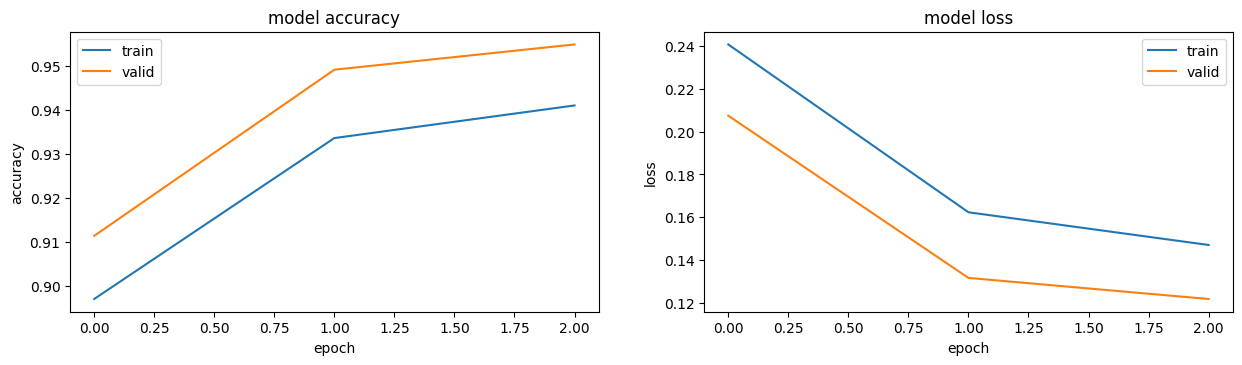

In [ ]:
plt.figure(1, figsize = (12,6))

plt.subplot(221)
plt.plot(vgg_model_history.history['accuracy'])
plt.plot(vgg_model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])

plt.subplot(222)
plt.plot(vgg_model_history.history['loss'])
plt.plot(vgg_model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])

plt.show()

In [ ]:
test_generator.reset()

pred = vgg_model.predict(test_generator, steps = len(test_generator), verbose = 2)

predicted_class_indices = np.argmax(pred, axis = 1)

624/624 - 245s - 245s/epoch - 393ms/step


In [ ]:
base_dir= "../content/pediatric-pneumonia-chest-xray/Pediatric Chest X-ray Pneumonia/"
y_test = Target_Data_Seperation(base_dir, target_path=[("test/NORMAL/", 0,), ("test/PNEUMONIA/", 1,)])